In [53]:
# Author: Bhogaraju Shanmukha Sri Krishna
# RollNo: 112201013
print("Hello World!")

Hello World!


In [54]:
import numpy as np
import scipy as sp
import pandas as pd

In [55]:
np.random.randint(1,6,(2,3),dtype='long')

array([[3, 5, 2],
       [1, 2, 4]])

In [56]:
X1 = np.random.uniform(0, 5, 100)
X1

array([1.73088238, 3.89656103, 1.09010616, 1.40251329, 1.23389947,
       3.62755309, 0.00861986, 1.50018472, 0.27891528, 4.49292985,
       1.62658211, 0.82158138, 4.58157212, 1.3808635 , 0.95058108,
       0.79026622, 2.74018109, 4.02987472, 4.91526236, 2.25673826,
       1.22754677, 2.20558728, 3.10625043, 0.86773515, 3.41578737,
       4.55380462, 0.61809926, 3.69522352, 0.31424733, 3.16620193,
       2.30960407, 0.3368154 , 2.01152136, 1.39327038, 1.90508983,
       0.66107886, 4.1368671 , 3.46698792, 0.1239553 , 4.39733934,
       2.19882304, 3.46720216, 0.37317799, 0.78889681, 1.19217969,
       3.79779481, 0.79939991, 4.04742327, 4.23287024, 2.37588375,
       0.33504223, 4.02062141, 1.99511661, 2.05418774, 3.00452397,
       0.31678645, 3.71092156, 1.31625891, 2.22882212, 0.48260055,
       1.05634047, 2.60030578, 0.28625433, 0.71488327, 0.22984393,
       3.42863808, 0.60805641, 1.45842875, 3.19484761, 2.21758498,
       0.56644075, 4.29922556, 3.86190132, 3.67849799, 2.18492

In [57]:
# Task1a Generating samples
# Dont run this again
X = np.random.rand(100) * 5
a = np.random.rand()
b = np.random.rand()
e = np.random.rand(100)
def f(x, i):
    return x ** 2 + a * x + b + e[i]

yList = [f(X[i], i) for i in range(len(X))]
Y = np.array(yList)
Y

one = np.ones(100, dtype = 'long')
X1 = np.column_stack((one, X))
X

array([1.06563844, 4.08445591, 3.43816056, 1.0095706 , 4.50005646,
       3.84824911, 3.02239445, 2.23951277, 1.63315167, 3.36021701,
       0.65023566, 2.72937453, 1.43008797, 1.63358482, 2.19316275,
       1.64227001, 2.83079026, 3.45150949, 4.39149904, 3.26366284,
       3.50170365, 3.23770232, 0.78977213, 0.28389881, 1.31538728,
       4.16336467, 2.01462938, 0.00819435, 3.51919008, 2.22067359,
       1.69761125, 2.80785752, 3.48824331, 0.03769562, 0.31926386,
       3.42063932, 2.76952732, 0.94482847, 0.11946972, 3.59418526,
       2.43563812, 0.87072985, 0.85789756, 0.45401259, 0.92892534,
       4.76779389, 2.80065087, 0.6961419 , 3.99874662, 0.95699071,
       2.07154755, 4.09855609, 1.20919819, 3.74792303, 0.39213473,
       2.39361122, 3.86741376, 3.10861273, 1.41797973, 0.90230757,
       1.7164279 , 4.27145145, 2.97961317, 4.09292438, 1.55024201,
       1.61598125, 1.07288182, 3.20529801, 4.23186308, 3.74513391,
       1.66990205, 0.10971986, 2.63872506, 3.57122052, 0.01583

In [58]:
# Task1b Find linear regressor
beta = np.linalg.inv(X1.T @ X1) @ X1.T @ Y
beta
# The values listed will be the required c, m values

array([-2.09198242,  4.72164184])

In [59]:
# Task 1c Mean square error
import sklearn

In [60]:
from sklearn.metrics import mean_squared_error as mse
def yPredF(x, i):
    return beta[0] + beta[1] * x[i]
# My predicted values 
yPredList = [yPredF(X, i) for i in range(len(X))]
yPred = np.array(yPredList)

meanErr = mse(Y, yPred)
meanErr

2.7847961936346253

In [61]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
X2 = X.reshape(-1, 1)
model1.fit(X2, Y)

model1.coef_, model1.intercept_

(array([4.72164184]), -2.0919824176384214)

In [62]:
from matplotlib import pyplot as plt

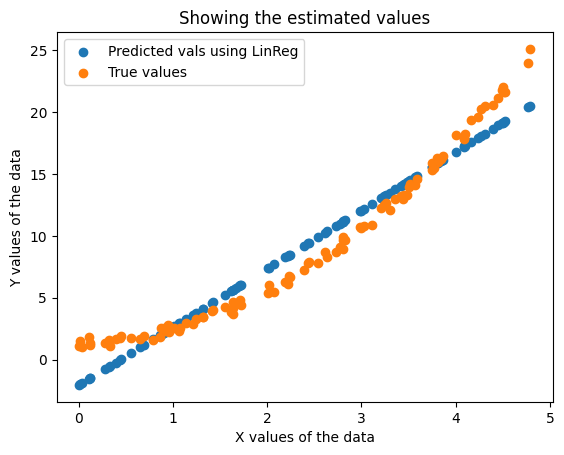

In [63]:
xValues = X
yValues = yPred

plt.xlabel("X values of the data")
plt.ylabel("Y values of the data")
plt.title("Showing the estimated values")
plt.scatter(X, yPred, label = "Predicted vals using LinReg")
plt.scatter(X, Y, label = "True values")
plt.legend()

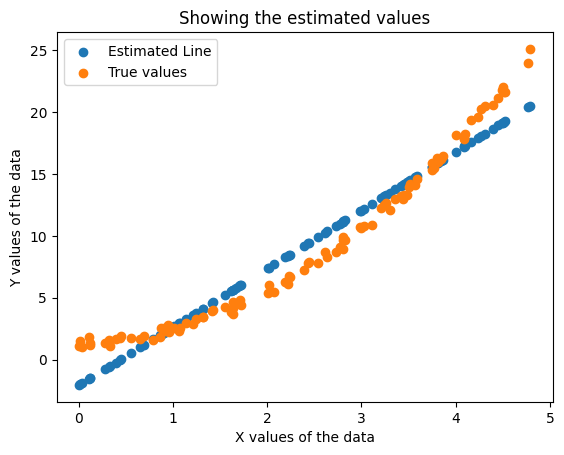

In [64]:


xValues = X
yValues = model1.predict(X2)
yTrue = Y


plt.xlabel("X values of the data")
plt.ylabel("Y values of the data")
plt.title("Showing the estimated values")

plt.scatter(xValues, yValues, label = "Estimated Line")

plt.scatter(xValues, Y, label = "True values")

plt.legend()
plt.show()

In [65]:
# MSE sklearn
mseLoss = mse(Y, yValues)
mseLoss

2.7847961936346235

In [66]:
modelQuad = LinearRegression()

Xsq = np.array([x ** 2 for x in X])

Xdash = np.column_stack((Xsq, X, one))
M = np.linalg.inv(Xdash.T @ Xdash) @ Xdash.T @ Y

yPredQ = np.array([ M[0] * x**2 + M[1] * x + M[2] for x in X])
mseQLoss = mse(Y, yPredQ)
mseQLoss

0.08450822946087136

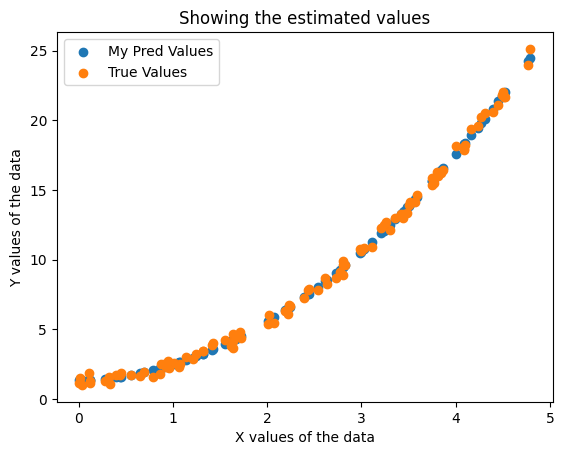

In [67]:
plt.xlabel("X values of the data")
plt.ylabel("Y values of the data")
plt.title("Showing the estimated values")

plt.scatter(X, yPredQ, label = "My Pred Values")
plt.scatter(X, Y, label = "True Values")
plt.legend()

# Analysis: Quadratic is better than linear as less mse and more closely fit

In [68]:
# Task 2a Reading data and describing it
df = pd.read_csv('week3/medical_expenditure.csv')
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0.0,yes,southwest,16884.92400
1,2,18,male,33.770,1.0,no,southeast,1725.55230
2,3,28,male,33.000,3.0,no,southeast,4449.46200
3,4,33,male,22.705,0.0,no,northwest,21984.47061
4,5,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3.0,no,northwest,10600.54830
1334,1335,18,female,31.920,0.0,no,northeast,2205.98080
1335,1336,18,female,36.850,0.0,no,southeast,1629.83350
1336,1337,21,female,25.800,0.0,no,southwest,2007.94500


In [69]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1336.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.095060,13270.422265
std,386.391641,14.049960,6.098187,1.205769,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [70]:
df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    2
smoker      1
region      2
charges     0
dtype: int64

In [71]:
mean_values = df.mean(numeric_only = True)
modeSer = pd.Series(data = df['smoker'])  
modeSer2 = pd.Series(data = df['region'])
x = modeSer.mode()
y = modeSer2.mode()

values = {'children': mean_values, 'smoker': x[0], 'region': y[0]}

df = df.fillna(value = values)
x, y

(0    no
 Name: smoker, dtype: object,
 0    southeast
 Name: region, dtype: object)

In [72]:
df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    2
smoker      0
region      0
charges     0
dtype: int64

In [73]:
mean_values

Id            669.500000
age            39.207025
bmi            30.663397
children        1.095060
charges     13270.422265
dtype: float64

In [74]:
df['children'] = df['children'].fillna(mean_values['children'])
df.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [75]:
from sklearn.preprocessing import OrdinalEncoder

xt1 = df.drop(columns=['charges'])
yt1 = df['charges'] 

ord_enc = OrdinalEncoder()

newDF = pd.DataFrame(ord_enc.fit_transform(xt1))
# ord_enc.fit(xt1)
newDF

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,197.0,0.0,1.0,3.0
1,1.0,0.0,1.0,350.0,1.0,0.0,2.0
2,2.0,10.0,1.0,331.0,4.0,0.0,2.0
3,3.0,15.0,1.0,73.0,0.0,0.0,1.0
4,4.0,14.0,1.0,223.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
1333,1333.0,32.0,1.0,276.0,4.0,0.0,1.0
1334,1334.0,0.0,0.0,302.0,0.0,0.0,0.0
1335,1335.0,0.0,0.0,422.0,0.0,0.0,2.0
1336,1336.0,3.0,0.0,146.0,0.0,0.0,3.0


In [76]:
categ = set()
for cat, val in df.items():
    if val.dtype == 'object':
        categ.add(cat)
categ

{'region', 'sex', 'smoker'}

In [77]:
from sklearn.preprocessing import LabelEncoder

newM = LabelEncoder()

catDict = {i: LabelEncoder() for i in categ}

# newM.fit(df['region'])
# newM.transform(df['region'])

for cat in catDict:
    catDict[cat].fit(df[cat])
    df[cat] = catDict[cat].transform(df[cat])
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0.0,1,3,16884.92400
1,2,18,1,33.770,1.0,0,2,1725.55230
2,3,28,1,33.000,3.0,0,2,4449.46200
3,4,33,1,22.705,0.0,0,1,21984.47061
4,5,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,1,30.970,3.0,0,1,10600.54830
1334,1335,18,0,31.920,0.0,0,0,2205.98080
1335,1336,18,0,36.850,0.0,0,2,1629.83350
1336,1337,21,0,25.800,0.0,0,3,2007.94500


In [78]:
xlist = np.array([])
ylist = np.array(df['charges'])

for cat in df:
    if cat != 'charges':
        if len(xlist) == 0:
            xlist = np.array(df[cat])
        else:
            xlist = np.column_stack((xlist, df[cat]))

xlist = np.array(xlist)
ylist = np.array(ylist)

xlist, ylist

(array([[1.000e+00, 1.900e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         3.000e+00],
        [2.000e+00, 1.800e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
         2.000e+00],
        [3.000e+00, 2.800e+01, 1.000e+00, ..., 3.000e+00, 0.000e+00,
         2.000e+00],
        ...,
        [1.336e+03, 1.800e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         2.000e+00],
        [1.337e+03, 2.100e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         3.000e+00],
        [1.338e+03, 6.100e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         1.000e+00]]),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

In [99]:
?sklearn.linear_model.Ridge

Init signature:
sklearn.linear_model.Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Constant that multiplies the L2 term, controlling regularization
    strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.

    When `alpha = 0`, the objective is equivalent to

In [100]:
help(sklearn.metrics)

Help on package sklearn.metrics in sklearn:

NAME
    sklearn.metrics - Score functions, performance metrics, pairwise metrics and distance computations.

PACKAGE CONTENTS
    _base
    _classification
    _dist_metrics
    _pairwise_distances_reduction (package)
    _pairwise_fast
    _plot (package)
    _ranking
    _regression
    _scorer
    cluster (package)
    pairwise
    tests (package)

CLASSES
    builtins.object
        sklearn.metrics._dist_metrics.DistanceMetric
        sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
        sklearn.metrics._plot.regression.PredictionErrorDisplay
    sklearn.utils._plotting._BinaryClassifierCurveDisplayMixin(builtins.object)
        sklearn.metrics._plot.det_curve.DetCurveDisplay
        sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay
        sklearn.metrics._plot.roc_curve.RocCurveDisplay
    
    class ConfusionMatrixDisplay(builtins.object)
     |  ConfusionMatrixDisplay(confusion_matrix, *, display_la

In [79]:
# Task 2b Linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xlist, ylist, test_size=0.20, random_state=42)


In [80]:

newModel = LinearRegression()

newModel.fit(X_train, y_train)

store = newModel.predict(X_train)

findPrec = newModel.predict(X_test)
mse(y_train, store)

37247113.52644063

In [81]:
score = newModel.score(X_test, y_test)
score

0.7820000953099655

/tmp/ipykernel_15005/710742194.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


([0, 1, 2, 3, 4, 5, 6, 7],
 array([ 5.22780677e-01,  2.57554028e+02, -9.44210185e+00,  3.36340856e+02,
         4.13164691e+02,  2.36365402e+04, -2.69827735e+02]))

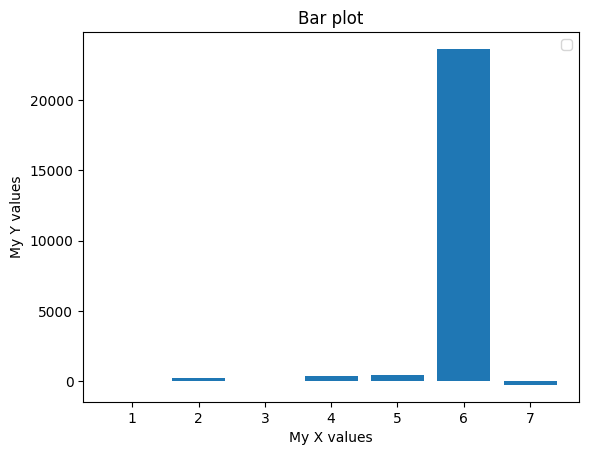

In [82]:


features = {}
count = 0
for i in df:
    features[i] = count
    count += 1

plt.title("Bar plot")
plt.xlabel("My X values")
plt.ylabel("My Y values")
plt.legend()

xvals = list(features.values())
yvals = newModel.coef_

plt.bar(xvals[1:], yvals)
xvals, yvals

In [94]:
# Task 2c Ridge regression
from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 1)
ridgeModel.fit(X_train, y_train)
storeRidge = ridgeModel.predict(X_train)
findRidge = ridgeModel.predict(X_test)

mse(y_train, storeRidge)

37250092.10407703

In [95]:
scoreR2r = ridgeModel.score(X_test, y_test)
scoreR2r

0.7817144102843274

In [96]:
ridgeModel.feature_names_in_

AttributeError: 'Ridge' object has no attribute 'feature_names_in_'

/tmp/ipykernel_15005/2228950380.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


AttributeError: 'Ridge' object has no attribute 'feature_names_in_'

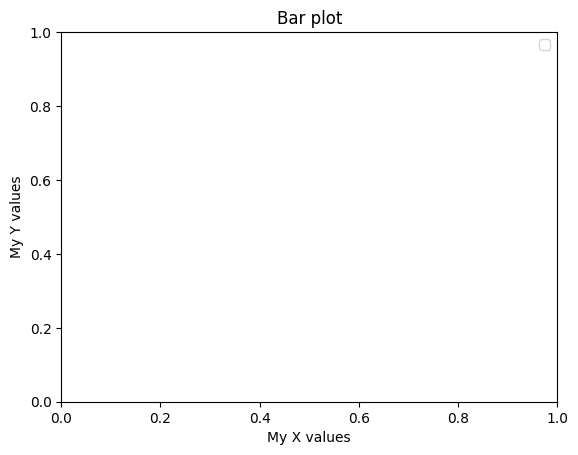

In [92]:
features = {}
count = 0
for i in df:
    features[i] = count
    count += 1

plt.title("Bar plot")
plt.xlabel("My X values")
plt.ylabel("My Y values")
plt.legend()

xvals = list(ridgeModel.feature_names_in_)
yvals = ridgeModel.coef_

plt.bar(xvals[1:], yvals)
xvals, yvals